In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Load your data

df = pd.read_csv('TSLA.csv')

# Select the features and normalize them
features = df[['High', 'Low', 'Open', 'Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

In [5]:
# Prepare the data for training
# Adjust this part to match the structure of your data
def create_dataset(X, time_steps=1):
    Xs = []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].to_numpy()
        Xs.append(v)        
    return np.array(Xs)

time_steps = 100
X = create_dataset(features, time_steps)
y = df['Close'].shift(-time_steps).dropna().values

In [6]:
# Devide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape data for the CNN model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

In [7]:
# Buld the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.2606 - val_loss: 405.2520
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.2466 - val_loss: 505.1126
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.0635 - val_loss: 430.5202
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.3454 - val_loss: 371.6677
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.6405 - val_loss: 359.2771
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.1852 - val_loss: 1305.7515
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.1007 - val_loss: 286.6191
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.6332 - val_loss: 308.4603
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.4017 - val_loss: 284.8925
Epoch 10/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3195 - val_loss: 294.4817
Epoch 11/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.8448 - val_loss: 532.0619
Epoch 12/100
84/84 ━━━━━━━━━━━

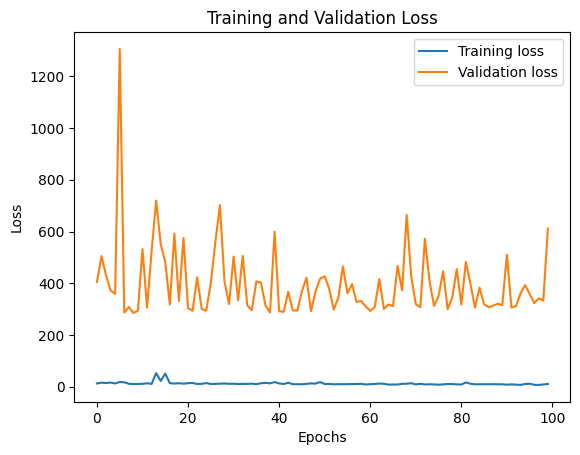

In [9]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Advantages of CNNs: ###

Effective Feature Extraction: CNNs are excellent at automatically learning and extracting relevant features from input data, such as edges, shapes, and patterns in images. This makes them highly effective for image-related tasks.

Translation Invariance: CNNs are designed to be translation invariant, meaning they can recognize patterns in images regardless of their position or location within the input data.

Reduced Complexity: CNNs reduce the number of parameters that need to be learned compared to fully connected neural networks, making them more efficient and less computationally expensive.

Shared Weights: CNNs use shared weights in their convolutional layers, which further reduces the number of parameters and computational requirements.

Scalability: CNNs can be scaled to handle large-scale datasets and complex problems by increasing the depth (number of layers) or width (number of filters) of the network.

### Disadvantages or Inconveniences of CNNs: ###

Data Dependency: CNNs require large datasets of labeled data for training, which can be time-consuming and costly to acquire.

Training Time: Training CNNs, especially deep models with many layers, can be computationally intensive and time-consuming, often requiring powerful hardware like GPUs.

Overfitting: Like other deep learning models, CNNs can be susceptible to overfitting, where the model performs well on the training data but fails to generalize to new, unseen data.

Lack of Interpretability: CNNs are often considered "black boxes," making it difficult to understand and interpret the 
learned features and decision-making process of the model.

Spatial Information Loss: While CNNs are translation invariant, they can lose some spatial information during the pooling operations, which may be important in certain applications.

Limited Contextual Information: CNNs primarily focus on local spatial patterns and may struggle to capture long-range contextual information or relationships within the input data.

Transfer Learning Challenges: While transfer learning can be useful in some cases, CNNs trained on specific datasets may not always transfer well to different domains or tasks.